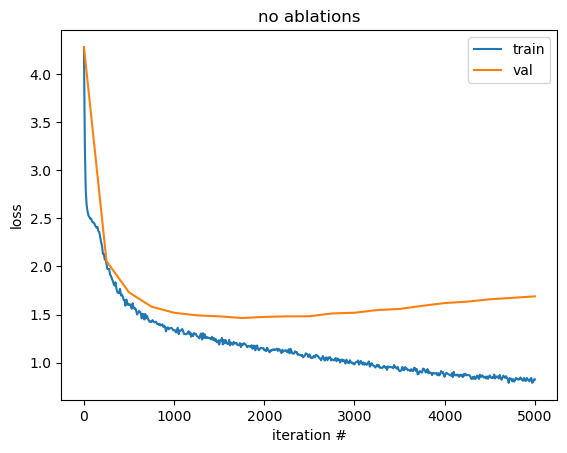

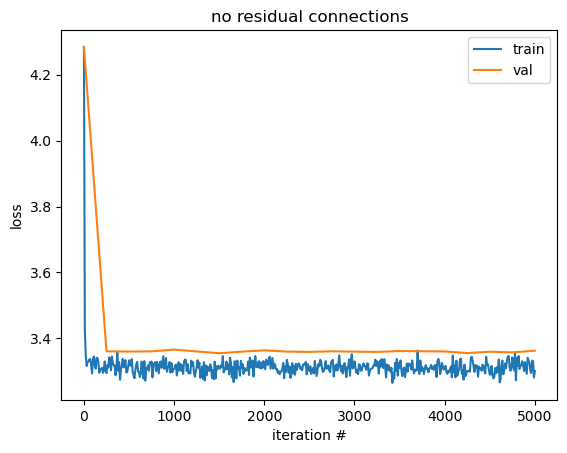

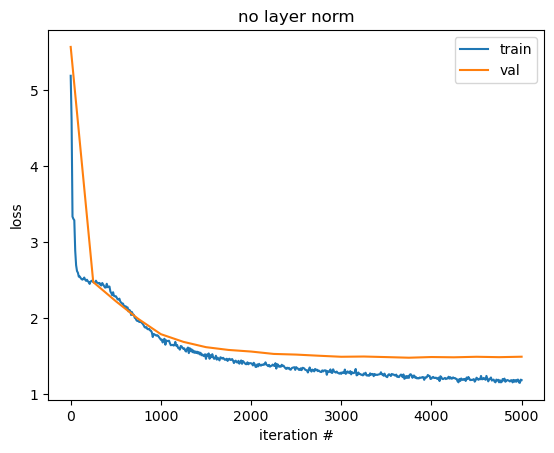

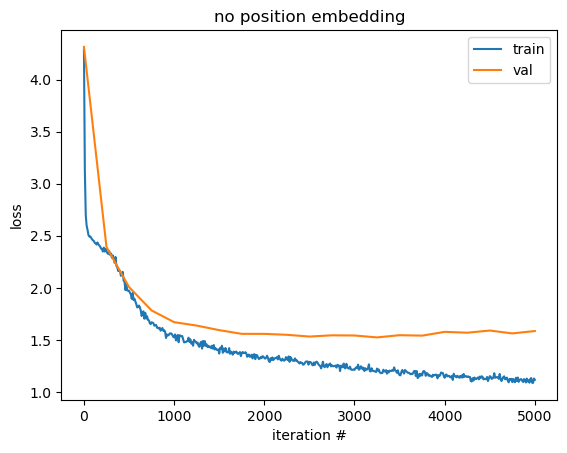

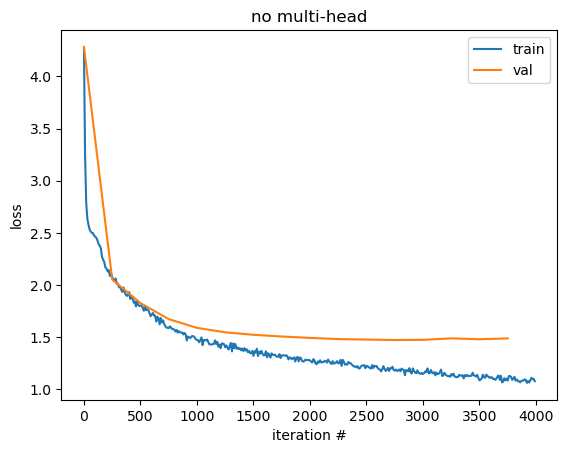

In [25]:
import re
import matplotlib.pyplot as plt

def create_ablation_plot(idx, title):
    with open(f"ablation{idx}") as f:
        data = f.read()
    pattern = r"iter (\d+): loss ([\d\.]+)"
    
    # Find all matches in the data
    matches = re.findall(pattern, data)
    
    # Convert matches to two separate lists: one for iter numbers, one for train loss values
    iter_nums = [int(match[0]) for match in matches]
    train_losses = [float(match[1]) for match in matches]

    pattern = r"step (\d+): .* val loss ([\d\.]+)"
    matches = re.findall(pattern, data)
    val_iter_nums = [int(match[0]) for match in matches]
    val_losses = [float(match[1]) for match in matches]
    
    plt.plot(iter_nums, train_losses)
    plt.plot(val_iter_nums, val_losses)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('iteration #')
    plt.legend(['train','val'])
    plt.show()
    return val_iter_nums, val_losses

ablation_to_title = {0: "no ablations", 1: "no residual connections", 2: "no layer norm", 3: "no position embedding", 4: "no multi-head"}
val_iter_nums = []
val_losses = []
for i in range(5):
    val_iter_nums_i, val_losses_i = create_ablation_plot(i, ablation_to_title[i])
    val_iter_nums.append(val_iter_nums_i)
    val_losses.append(val_losses_i)

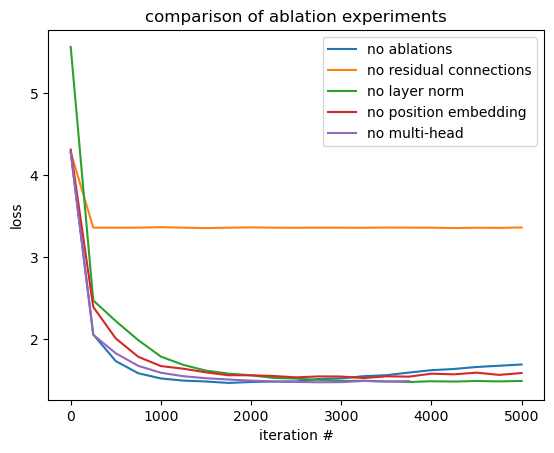

In [31]:
for i in range(5):
    plt.plot(val_iter_nums[i], val_losses[i])
plt.ylabel('loss')
plt.xlabel('iteration #')

plt.legend([ablation_to_title[i] for i in range(5)])
plt.title('comparison of ablation experiments')
plt.show()